## 7주차 인공신경망 기초 - 다층 퍼셉트론(multi-perceptron) 구현

### 4. 텐서플로우를 이용한 MLP구현

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf         # 텐서플로우는 주로 tf라는 별명을 사용한다
from tensorflow import keras

케라스에서 제공하는 **시퀀셜**<sup>Sequential</sup> 클래스로 구현
+ **밀집**<sup>dense</sup> 계층
+ 각 층이 가진 활성화 함수는 시그모이드

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation='sigmoid'),
    keras.layers.Dense(4, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid'),
])

모델을 사용하기 위해서는 **컴파일<sup>compile</sup>**과정
+ 컴파일 과정에서는 최적화 방법을 지정하고, 오차 측정을 어떤 기준으로 할 것인지 지정
+ 평균 제곱 오차를 손실함수로 사용한다면 'mse'를 손실 매개변수 loss의 인자로 지정

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'nonlinear.csv')
X       = df['x'].to_numpy()
y_label = df['y'].to_numpy()

In [ ]:
# 에폭epoch를 지정하는데, 하나의 데이터셋에 대해 몇 번 훈련을 반복할 것인지를 의미
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6210
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6184
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5924
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5183
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4481
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4180
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4135
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4055
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4071
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4093
Epoch 13/100
32/32 [=================

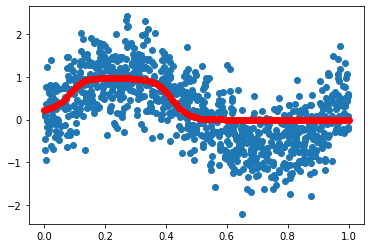

In [ ]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형

y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')